# K-Means(Application)

- (1)传统K-Means
- (2)K-Means++
- (3)K-Means在压缩图片中的应用

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

### 1 Load data

这里的数据集我们依然选择scikit-learn上的鸢尾花数据集

In [2]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100, [0, 1, -1]])
    return data[:,:2], data[:,-1]

In [3]:
X, y = create_data()

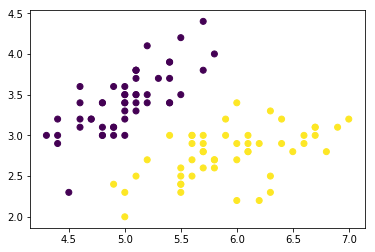

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

### 2 Origianl K-Means

**K-Means Algorithm:**

输入:样本集$X={x_1,x_2,...,x_m}$,聚类数为$K$,最大迭代数$Iter$.

输出: 划分的聚类数$c_1,c_2,...,c_k$

(1)从数据集中随意挑选出$K$个样本作为初始的质心(center)向量$\mu$

(2)迭代$iter=1,2,...,Iter$.

- 对于$i=1,2,...,m;k=1,2,...,K$个样本$x_i$计算和各个center的距离$d_{ik}$ 
    - $d_{ik}= ||x_{ik}-\mu_{ik}||^{2}$或者$D = \sum_{i=1}^{m}\sum_{k=1}^{K}||x_i-\mu{k}||^{2}$
    
- 对于每一个样本点,获取与其最近的center,将其归为一类.

- 得到新的$k$类群后,计算新的center,即当前聚类群的均值.
    - $\mu=\frac{\sum x_{k}}{N_{c_k}}$
    
- 如果$k$个center向量变化在阈值内,则视为收敛退出迭代

(3) 得到$K$个center:$C={c_1,c_2,...,c_k}$

### 2.1 K-Means Original Model

假设现在数据的维度是m,n:m个样本,n个features.

参数维度:
- center:有K个质心且每个质心都能与样本计算距离,所以center(K,n)
- labels:有m个样本需要预测,所以labels(m,)

In [5]:
def K_means_Original(X,K,Iter):
    """
    Implementation original K-Means
    
    Parameters:
    ----------
        X: data set
        K: Number of cluster centers.
        Iter: Number of iterative
    
    Return:
    ------
        labels: predict labels.
        center: cluster centers
        cost: loss value.
    """
    m,n = X.shape
    D = np.zeros((m,K)) # cache distance d.
    
    # initial center about 3 lines.
    shuffle_X = np.copy(X)
    np.random.shuffle(shuffle_X)
    center = shuffle_X[:K]
    
    cost = {} # cache loss value.
    
    for iter_ in range(Iter):
        
        # calculate distance with every points and every center.
        for i in range(K):
            d = np.sum((X-center[i])**2,axis=1)
            D[:,i] += d
            
        # Get the point with the nearest center.
        labels = np.argmin(D,axis=1) # if label = 0: center1,label=1:center2
        
        # start update center.
        for k in range(K):
            center_X = X[np.where(labels==k)[0]] # get point in the nearest center.
            center[k,:] = np.sum(center_X,axis=0) / center_X.shape[0] # compute mean,and update center.
            
            # compute loss 
            loss = np.sum(np.sum((center_X-center[k,:])**2,axis=1)) /m
            
            # cache loss in k center
            if k not in cost and Iter % 10 ==0:
                cost[k] = [loss]
            else:
                cost[k].append(loss)
        
    return labels,center,cost

In [6]:
labels,center,cost = K_means_Original(X,2,100)

得到了最优的labels我们可以尝试使用预测的labels来绘制数据

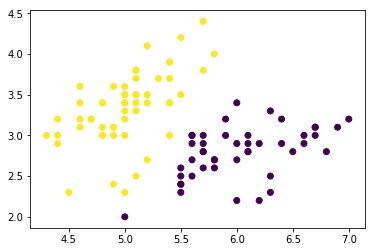

In [7]:
plt.scatter(X[:,0],X[:,1],c=labels)

可以看出分类的结果只是一般的,如果你多运行几次,你会发现效果差异很大.

我们继续绘制cost

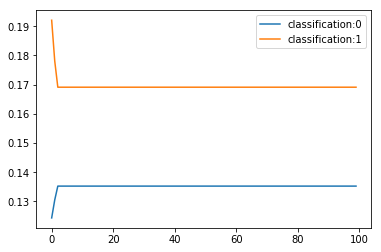

In [8]:
for k,loss in cost.items():
    plt.plot(loss,label="classification:"+str(k))
    plt.legend()

这里大家可能就会有疑问了,为什么一条loss是下降的,而另一条是上升的,这是因为:

在初次迭代的时候,肯定有一个center下的数据量会多一些,那么loss初始值就会大,另一个数据量会少些,loss初始值就会小.

在迭代过程中:
- center的loss初始值大的会因为丢弃掉一些数据点而下降,最终该center周围的数据点趋近稳定.
- center的loss初始值小的会因为得到一些数据点而上升,最终该center周围的数据点趋近稳定.


所以只要将上升的loss添加一个负号就可以了

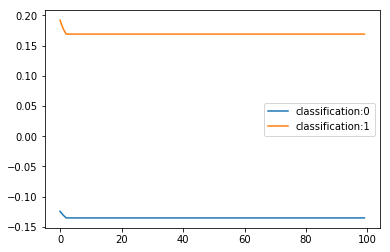

In [9]:
for k,loss in cost.items():
    if k == 0:
        plt.plot([-i for i in loss],label="classification:"+str(k))
    else:
        plt.plot(loss,label="classification:"+str(k))
plt.legend()

### 2.2 K-Means-Animation

我们定义一个动态图,来动态观测下K-Means的聚合过程

In [10]:
def K_means_Animation(X,center,labels):
    %matplotlib inline
    from IPython import display
    plt.scatter(X[:,0],X[:,1],c=labels)
    plt.scatter(center[0,0],center[0,1],c='red',marker='^',s=100)
    plt.scatter(center[1,0],center[1,1],c='black',marker='o',s=100)
    plt.pause(0.1)
    plt.show()
    display.clear_output(wait=True)

In [11]:
def K_means_Original_Animation(X,K,Iter):
    """
    Implementation original K-Means
    
    Parameters:
    ----------
        X: data set
        K: Number of cluster centers.
        Iter: Number of iterative
    
    Return:
    ------
        labels: predict labels.
        center: cluster centers
        cost: loss value.
    """
    m,n = X.shape
    D = np.zeros((m,K)) # cache distance d.
    
    # initial center about 3 lines.
    shuffle_X = np.copy(X)
    np.random.shuffle(shuffle_X)
    center = shuffle_X[:K]
    
    cost = {} # cache loss value.
    
    for iter_ in range(Iter):
        
        # calculate distance with every points and every center.
        for i in range(K):
            d = np.sum((X-center[i])**2,axis=1)
            D[:,i] += d
            
        # Get the point with the nearest center.
        labels = np.argmin(D,axis=1) # if label = 0: center1,label=1:center2
        
        # start update center.
        for k in range(K):
            center_X = X[np.where(labels==k)[0]] # get point in the nearest center.
            center[k,:] = np.sum(center_X,axis=0) / center_X.shape[0] # compute mean,and update center.
            
            # compute loss 
            loss = np.sum(np.sum((center_X-center[k,:])**2,axis=1)) /m
            
            # cache loss in k center
            if k not in cost and Iter % 10 ==0:
                cost[k] = [loss]
            else:
                cost[k].append(loss)
                
        # start Animation plot
        K_means_Animation(X=X,center=center,labels=labels)
    return labels,center,cost

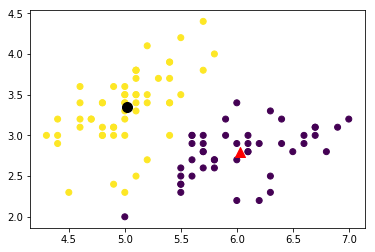

In [12]:
labels,center,cost = K_means_Original_Animation(X,2,100)

### 3 K-Means++

我们知道传统K-Means由于center的初始值是随机的,所以聚合的效果不是很好,我们现在采用K-Means++得到的初始值进行尝试.

**K-Means++ algorithm:**

输入:数据集,聚类数量$K$

输出: 聚类center$c_1,c_2,...,c_K$

(1)从输入的数据点集合中随机选择一个点作为第一个聚类center.

(2)对于样本的每一个数据点,**计算与其最近的center**,得到距离$d_i$,center集群中的样本组成的距离向量为$D(X)=\{d_1,d_2,...,d_{n}\}$,随机取一个Random能够落在$\sum D$内,然后做循环: Random -= $D(x)$ 直到Random <=0.

(3) 以概率的方式选择距离较大的点作为下一个聚类center.

(4)重复(2),(3)直到获取$K$个center作为初始center放入传统的K-Means中去.

**Ps:**
- 由于第一个质心(center)是随机产生的,所以实际上只迭代K-1次.

In [18]:
def kpp(X,K):
    """
    Implementation K-Means++
    
    Parameters:
    ----------
        X: data set.
        K: Number of cluster centers.
    Return:
    ------
        cluster_centers:centers array. shape is (K,n)
    """
    
    m,n = X.shape
    cluster_centers = np.zeros((K,n)) # cache centers.
    index = np.random.randint(0,X.shape[0]) # random index
    cluster_centers[0] = X[index] # get initial random data in X
    ds_cache = np.zeros((m,K)) # cache distance with every centers and points.
    
    # start get centers.
    for k in range(1,K):
        
        for j in range(K):
            ds_cache[:,j] = np.sum(np.power((X-cluster_centers[j]),2),axis=1) # compute distance with every centers and points.
        
        D = np.min(ds_cache,axis=1) # 计算每个数据点与其最近的中心距离
  
        random_ = np.random.rand() * D.sum() # 保证随机数能够落在sum(D(x)) 内
        
        # 寻找最远的样本点的索引放入X从而得到距离center最远的点
        for j,di in enumerate(D):
            random_ -= di
            if  random_<= 0:
                cluster_centers[k,:] += X[j]
                break
                
    return cluster_centers

In [27]:
cluster_centers = kpp(X,2)
cluster_centers

array([[5.2, 3.4],
       [6.2, 2.2]])

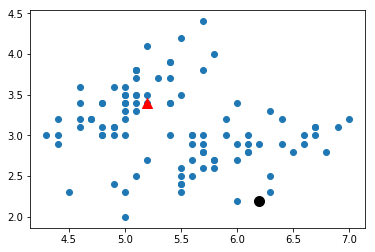

In [28]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(cluster_centers[0,0],cluster_centers[0,1],c='red',marker='^',s=100)
plt.scatter(cluster_centers[1,0],cluster_centers[1,1],c='black',marker='o',s=100)

可以看出两个初始center之间的距离相对比较远.

现在使用K-Means++来对K-Means进行优化

In [29]:
def K_means(X,K,Iter):
    """
    Implementation original K-Means
    
    Parameters:
    ----------
        X: data set
        K: Number of cluster centers.
        Iter: Number of iterative
    
    Return:
    ------
        labels: predict labels.
        center: cluster centers
        cost: loss value.
    """
    m,n = X.shape
    D = np.zeros((m,K)) # cache distance d.
    
    # use KPP initial center.
    
    center = kpp(X,K)
    
    for iter_ in range(Iter):
        
        # calculate distance with every points and every center.
        for i in range(K):
            d = np.sum((X-center[i])**2,axis=1)
            D[:,i] += d
            
        # Get the point with the nearest center.
        labels = np.argmin(D,axis=1) # if label = 0: center1,label=1:center2
        
        # start update center.
        for k in range(K):
            center_X = X[np.where(labels==k)[0]] # get point in the nearest center.
            center[k,:] = np.sum(center_X,axis=0) / center_X.shape[0] # compute mean,and update center.
            
            # compute loss 
            loss = np.sum(np.sum((center_X-center[k,:])**2,axis=1)) /m
                
    return labels,center

In [30]:
labels,center = K_means(X,2,300)

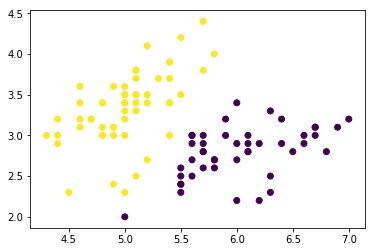

In [31]:
plt.scatter(X[:,0],X[:,1],c=labels)

### 4 Scikit-learn

同样我们也可以使用sklearn中的[KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)来聚合.

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0,max_iter=300).fit(X)

In [33]:
B = kmeans.labels_

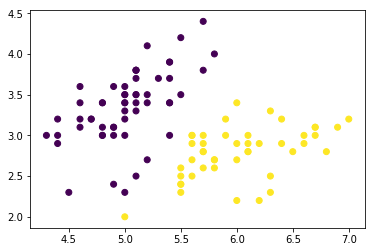

In [34]:
plt.scatter(X[:,0],X[:,1],c=B)

可以看出在相同迭代下,结果是一样的.

### 5 K-Means之缩略图处理

实际做法就是:将每个像素点当作一个数据,跑一下K-means,得到k个centroids,然后用这些centroids的像素值来代替对应的cluster里的所有点的像素值。对于彩色图片来说,例如RGB三色的图片,每一个像素被当作是一个3维向量空间中的点.

就是将原图中的每一个像素以K中颜色填充,从而压缩图片.


下图显示了[K-Means压缩详解](https://www.jianshu.com/p/594e9fc5db9a):
![](picture/51.png)

首先加载原图:

In [35]:
image = plt.imread('data_set/lenna.png')
image.shape

(220, 220, 3)

可以看出图片的$width=220,height=220,channel=3$

显示原图:

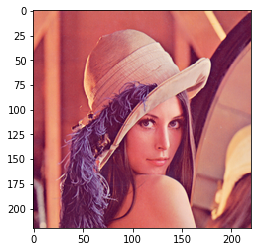

In [36]:
plt.imshow(image)

将图片转化为K-Means能够接受的形式:
- shape:width * height,3.
    - 这样的数据实际上每一个像素点(每一行)有三个特征分别是R,G,B.

In [37]:
new_image = image.reshape(image.shape[0]*image.shape[1],3)

In [38]:
labels,center = K_means(X=new_image,K=2,Iter=300)
print("labels shape is : ",labels.shape)
print("center is : ",center)

labels shape is :  (48400,)
center is :  [[0.51277459 0.18639447 0.30394816]
 [0.83847314 0.52559733 0.48766488]]


- 这里显示的$48400=220*220$就是所有的像素点(样本点).
- 这里显示的ceter就是聚类中心,两个中心,每个中心有RGB三个特征.

使用cnter的值代替每个像素点的值

In [39]:
K_image = np.zeros((image.shape[0],image.shape[1],3))
# 遍历每个像素点，找到聚类中心对应的像素值
pixel_count = 0
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        cluster_idx = labels[pixel_count]
        # 获取聚类中心索引位置上的像素值
        cluster_value = center[cluster_idx]
        # 放入center的点的值
        K_image[i,j,:] += cluster_value
        pixel_count +=1

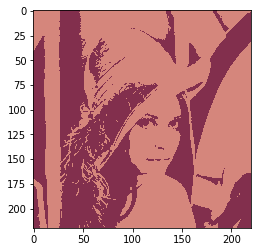

In [40]:
plt.imshow(K_image)
plt.imsave('K_image.png',K_image)

也可以先将labels转化为width,height的形式.

Text(0.5, 1.0, 'K=2')

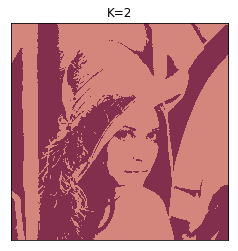

In [41]:
K_image2 = np.zeros((image.shape[0],image.shape[1],3))
labels_iamge = labels.reshape(image.shape[0],image.shape[1])
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        K_image2[i,j,:] = center[labels_iamge[i,j],:]
plt.imshow(K_image2);plt.xticks(());plt.yticks(());plt.title("K=2")

现在尝试不同的K对图像的压缩结果.
测试K=2,64,100

In [45]:
def Image_Compression(image,K=list):
    plt.figure(figsize=(10, 10)) 
    plt.subplot(2,2,1);plt.imshow(image);plt.xticks(());plt.yticks(());plt.title("Original")
    width,height,channel = image.shape
    new_image = image.reshape(width * height,3)
    for k in range(len(K)):
        labels,center = K_means(X=new_image,K=K[k],Iter=100)
        K_image = np.zeros((width,height,channel))
        labels_iamge = labels.reshape(width,height)
        for i in range(width):
            for j in range(height):
                K_image[i,j,:] = center[labels_iamge[i,j],:]
        plt.subplot(2,2,k+2);plt.imshow(K_image);plt.xticks(());plt.yticks(());plt.title("K="+str(K[k]))
        
    plt.show()

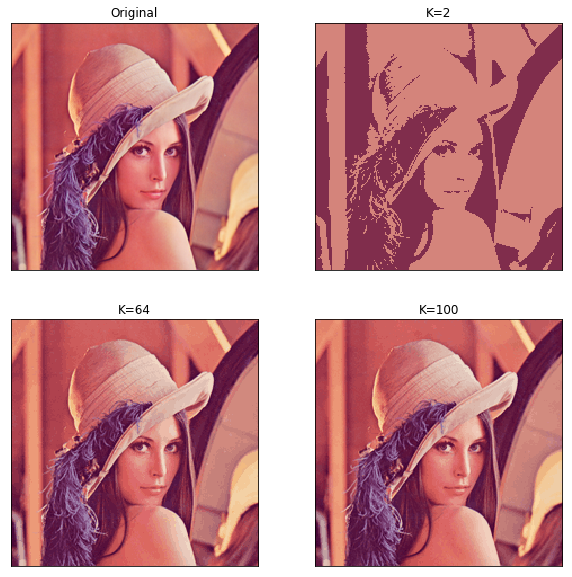

In [46]:
Image_Compression(image,K=[2,64,100])

需要注意的是:

如果你使用的是jpg,或者jpge的图片,那么在创建K_image矩阵的时候要指定detype=np.uint8

可以看出当K=64的时候,基本和原图没有什么区别,然而文件大小却减小了,可以使用plt.imsave()来保存图片并查看图片的大小.

到此K-Means的所有内容已经结束,Good Luck

# Homework

使用K-Means聚类手写数字

Good Luck~~

In [54]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
digits = load_digits()
data = scale(digits.data)
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target